In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Groceries_dataset.csv')  # Update the path to your dataset
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
# Create a basket matrix
basket = (data
          .groupby(['Member_number', 'itemDescription'])['itemDescription']
          .count().unstack().reset_index().fillna(0)
          .set_index('Member_number'))

# Convert counts to binary (1 if purchased, 0 if not)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18408\2674620334.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets

C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(other vegetables, whole milk, tropical fruit)"
161,0.071832,"(other vegetables, yogurt, whole milk)"
162,0.065162,"(soda, rolls/buns, whole milk)"
163,0.065931,"(yogurt, rolls/buns, whole milk)"


In [5]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,0.005773,1.017719,0.182309
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
4,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563


In [6]:
# Display rules sorted by lift
sorted_rules = rules.sort_values(by='lift', ascending=False)
sorted_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
196,(bottled water),"(other vegetables, whole milk)",0.213699,0.191380,0.056183,0.262905,1.373732,0.015285,1.097036,0.345995
193,"(other vegetables, whole milk)",(bottled water),0.191380,0.213699,0.056183,0.293566,1.373732,0.015285,1.113056,0.336445
195,(other vegetables),"(bottled water, whole milk)",0.376603,0.112365,0.056183,0.149183,1.327657,0.013865,1.043273,0.395885
194,"(bottled water, whole milk)",(other vegetables),0.112365,0.376603,0.056183,0.500000,1.327657,0.013865,1.246793,0.278035
238,(yogurt),"(other vegetables, whole milk)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727,0.343217
235,"(other vegetables, whole milk)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870,0.304344
192,"(other vegetables, bottled water)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,0.013162,1.349012,0.258544
197,(whole milk),"(other vegetables, bottled water)",0.458184,0.093894,0.056183,0.122620,1.305941,0.013162,1.032741,0.432376
248,"(rolls/buns, whole milk)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,0.015407,1.136802,0.284474
249,(yogurt),"(rolls/buns, whole milk)",0.282966,0.178553,0.065931,0.233001,1.304939,0.015407,1.070988,0.325899


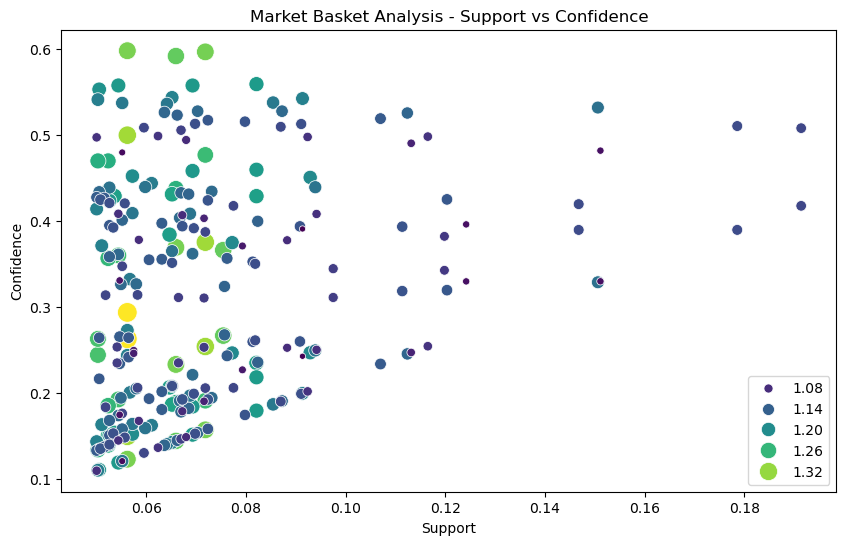

In [7]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis')
plt.title('Market Basket Analysis - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18408\3909722995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


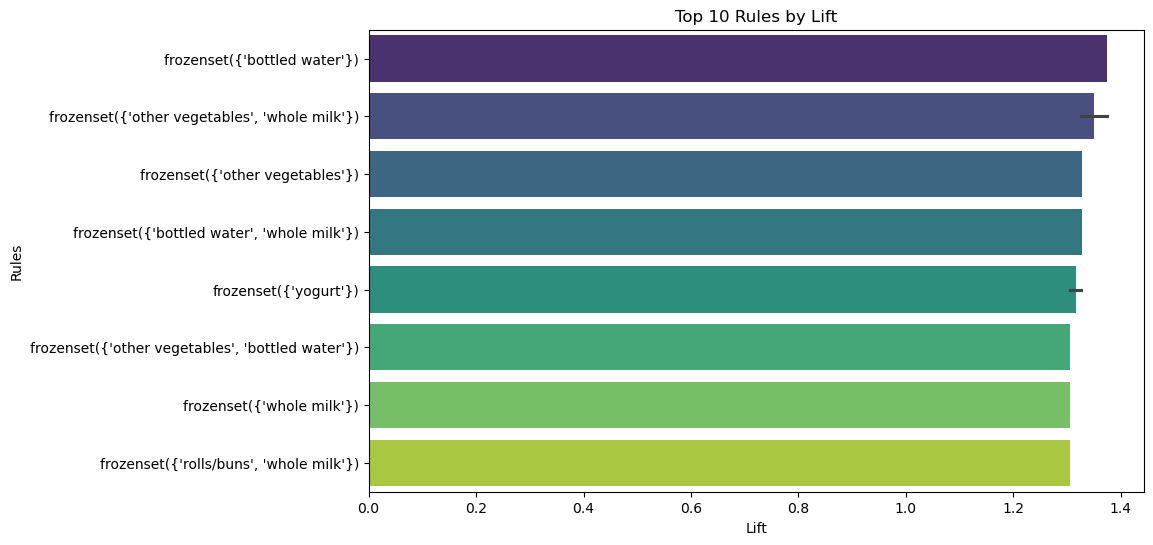

In [8]:
# Plotting the top rules based on lift
plt.figure(figsize=(10, 6))
top_rules = sorted_rules.head(10)
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

In [9]:
# Save the rules to a CSV file
rules.to_csv('association_rules.csv', index=False)